# Import Packages

In [57]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import ast
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from jcopml.plot import plot_confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter
import pandas as pd
import re
from wordcloud import WordCloud

# Load Preprocessed Dataset

In [38]:
df = pd.read_csv("data_prep.csv", usecols=['stemmed','sentimen'], encoding='latin-1')
df

,stemmed,sentimen
0,"['jangkau', 'hubung', 'kavling', 'tanah', 'jua...",Netral
1,"['akwowakoawkaow', 'kos', 'gawe', 'jakarta', '...",Netral
2,"['damage', 'parah', 'banget', 'nder', 'take', ...",Netral
3,"['goodbener', 'ajak', 'warga', 'dki', 'jakarta...",Netral
4,"['delapan', 'dukung', 'anies', 'butuh', 'jakar...",Netral
...,...,...
95,"['saking', 'otak', 'gagas', 'ngibul', 'ngarang...",Netral
96,"['cari', 'tanah', 'kavling', 'bangun', 'kebun'...",Netral
97,"['march', 'jakarta', 'indonesia', 'tickets', '...",Netral
98,"['kenneth', 'perintah', 'pusat', 'coba', 'jali...",Netral


# Data Exploration

## Check Missing Values

Mari kita lihat apakah dalam teks terdapat missing values setelah dilakukan pembobotan TF-IDF.

In [39]:
df.isna().sum()

stemmed     0
sentimen    0
dtype: int64

Dapat dilihat bahwa tidak ada nilai yang hilang dalam teks maupun variabel target pada data setelah dilakukan persiapan data.

## Sentimen

In [40]:
print(f"the number of column values is \n{df['sentimen'].value_counts()}:")

the number of column values is 
Netral     82
Positif    11
Negatif     7
Name: sentimen, dtype: int64:


Dari angka diatas, sentimen tweet lebih banyak yang merupakan sentimen netral dibandingkan sentimen positif maupun negatif.

## Frekuensi Kata

In [52]:
def tokenize(txt):
    return Counter(re.split('\W+', txt))

df['ctt'] = df['stemmed'].str.findall(r'\w+')

freq = Counter([item for sublist in df['ctt'].to_list() for item in sublist])
df_fdist = pd.DataFrame.from_dict(freq, orient='index')
df_fdist.columns = ['Frekuensi']
df_fdist.index.name = 'Kata'
df_fdist = df_fdist.sort_values(by=['Frekuensi'],ascending=False)

print(df_fdist.head(),'\n')

print(df_fdist.info())

         Frekuensi
Kata              
jakarta         81
kavling         18
tanah           16
jual            13
buah            12 

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, jakarta to korban
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Frekuensi  692 non-null    int64
dtypes: int64(1)
memory usage: 10.8+ KB
None


> **Insights:**

Dari informasi di atas:
* Kata Jakarta merupakan kata yang paling sering muncul pada data.
* Terdapat 692 kata yang muncul pada data tersebut.

## Wordcloud

### Worcloud pada Sentimen Netral

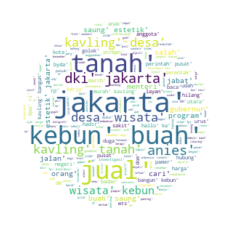

In [59]:
df_wc = df[(df['sentimen']=="Netral")][['stemmed']]
wc = ' '.join([word for word in df_wc["stemmed"]])
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(background_color="white", repeat=True, mask=mask)
wordcloud.generate(wc)

plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

### Worcloud pada Sentimen Positif

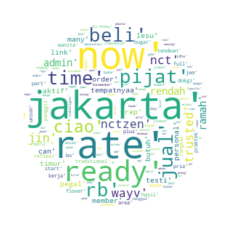

In [61]:
df_wc = df[(df['sentimen']=="Positif")][['stemmed']]
wc = ' '.join([word for word in df_wc["stemmed"]])
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(background_color="white", repeat=True, mask=mask)
wordcloud.generate(wc)

plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

### Worcloud pada Sentimen Negatif

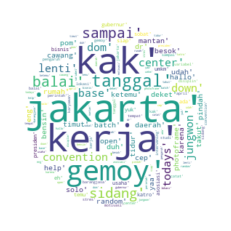

In [62]:
df_wc = df[(df['sentimen']=="Negatif")][['stemmed']]
wc = ' '.join([word for word in df_wc["stemmed"]])
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(background_color="white", repeat=True, mask=mask)
wordcloud.generate(wc)

plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")